In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from typing import Union, List
import joblib
import imblearn
import warnings
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib as plt
from sklearn import metrics

#warnings.filterwarnings(action='ignore')

## load data

In [2]:
df = pd.read_csv('modified_log_var25_0426.csv')

In [3]:
#df = p.get_df()
print(df.shape)
df

(1131682, 26)


,all_util_log,annual_inc_log,chargeoff_within_12_mths,delinq_amnt_log,dti_log,emp_length,fico_avg,int_rate,is_after_2012,is_after_2015,...,sub_grade,term,tot_cur_bal_log,total_acc_log,total_bc_limit_log,MORTGAGE,OTHERS,OWN,RENT,verification_status
0,4.174387,10.714440,0.0,0.0,2.269028,2,757.0,7.97,1,1,...,4,36,10.820878,3.610918,9.615872,True,False,False,False,0
1,4.454347,11.608245,0.0,0.0,3.575151,10,672.0,24.99,1,1,...,23,60,13.315176,4.110874,9.918425,True,False,False,False,0
2,3.332205,11.082158,0.0,0.0,2.930660,10,822.0,7.07,1,1,...,1,36,11.522113,3.367296,10.987003,True,False,False,False,1
3,3.637586,10.819798,0.0,0.0,2.078191,5,702.0,10.42,1,1,...,7,36,12.178635,2.302585,9.137877,True,False,False,False,1
4,0.000000,11.002116,0.0,0.0,3.399195,10,677.0,9.99,1,0,...,7,36,11.831590,3.713572,9.305741,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131677,0.000000,11.002116,0.0,0.0,3.045474,2,697.0,17.27,1,0,...,14,60,12.346938,2.833213,9.846970,True,False,False,False,0
1131678,0.000000,10.428246,0.0,0.0,3.004692,7,667.0,19.99,1,0,...,20,36,11.195760,2.302585,8.779711,True,False,False,False,1
1131679,0.000000,11.170449,0.0,0.0,3.215671,4,737.0,6.68,1,0,...,2,36,12.388636,3.526361,9.775711,True,False,False,False,1
1131680,0.000000,10.691968,0.0,0.0,2.628285,9,692.0,14.33,1,0,...,10,36,11.884551,2.197225,8.343078,True,False,False,False,0


In [4]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), index = df.index, columns = df.columns)

In [5]:
scaled_df

,all_util_log,annual_inc_log,chargeoff_within_12_mths,delinq_amnt_log,dti_log,emp_length,fico_avg,int_rate,is_after_2012,is_after_2015,...,sub_grade,term,tot_cur_bal_log,total_acc_log,total_bc_limit_log,MORTGAGE,OTHERS,OWN,RENT,verification_status
0,0.788616,0.578659,0.0,0.0,0.328475,0.2,0.512129,0.103583,1.0,1.0,...,0.117647,0.0,0.697662,0.622291,0.691673,1.0,0.0,0.0,0.0,0.0
1,0.841506,0.626931,0.0,0.0,0.517556,1.0,0.053908,0.766355,1.0,1.0,...,0.676471,1.0,0.858478,0.746129,0.713436,1.0,0.0,0.0,0.0,0.0
2,0.629513,0.598518,0.0,0.0,0.424257,1.0,0.862534,0.068536,1.0,1.0,...,0.029412,0.0,0.742873,0.561947,0.790299,1.0,0.0,0.0,0.0,1.0
3,0.687205,0.584349,0.0,0.0,0.300849,0.5,0.215633,0.198988,1.0,1.0,...,0.205882,0.0,0.785201,0.298221,0.657291,1.0,0.0,0.0,0.0,1.0
4,0.000000,0.594195,0.0,0.0,0.492084,1.0,0.080863,0.182243,1.0,0.0,...,0.205882,0.0,0.762826,0.647718,0.669366,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131677,0.000000,0.594195,0.0,0.0,0.440878,0.2,0.188679,0.465732,1.0,0.0,...,0.411765,1.0,0.796052,0.429656,0.708296,1.0,0.0,0.0,0.0,0.0
1131678,0.000000,0.563202,0.0,0.0,0.434974,0.7,0.026954,0.571651,1.0,0.0,...,0.588235,0.0,0.721832,0.298221,0.631528,1.0,0.0,0.0,0.0,1.0
1131679,0.000000,0.603287,0.0,0.0,0.465516,0.4,0.404313,0.053349,1.0,0.0,...,0.058824,0.0,0.798741,0.601347,0.703171,1.0,0.0,0.0,0.0,1.0
1131680,0.000000,0.577445,0.0,0.0,0.380483,0.9,0.161725,0.351246,1.0,0.0,...,0.294118,0.0,0.766240,0.272123,0.600121,1.0,0.0,0.0,0.0,0.0


## Design Matrix

In [6]:
df_X = scaled_df.drop(columns=['loan_status'])
df_y = scaled_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 30)

In [7]:
#smote oversample
smote = SMOTE(random_state = 30)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [8]:
ss = pd.DataFrame(X_train)
ss

,all_util_log,annual_inc_log,chargeoff_within_12_mths,delinq_amnt_log,dti_log,emp_length,fico_avg,int_rate,is_after_2012,is_after_2015,...,sub_grade,term,tot_cur_bal_log,total_acc_log,total_bc_limit_log,MORTGAGE,OTHERS,OWN,RENT,verification_status
0,0.000000,0.584349,0.0,0.0,0.448784,1.000000,0.161725,0.553349,1.0,0.0,...,0.647059,1.0,0.686263,0.398653,0.680266,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.606247,0.0,0.0,0.420421,0.000000,0.188679,0.150312,1.0,0.0,...,0.176471,0.0,0.622734,0.242949,0.410515,0.0,0.0,0.0,1.0,1.0
2,0.671669,0.598518,0.0,0.0,0.363772,0.000000,0.107817,0.496495,1.0,1.0,...,0.470588,0.0,0.861628,0.242949,0.546772,1.0,0.0,0.0,0.0,0.0
3,0.392844,0.595088,0.0,0.0,0.213494,0.700000,0.215633,0.079439,1.0,1.0,...,0.088235,0.0,0.527865,0.398653,0.752822,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.580178,0.0,0.0,0.506390,0.700000,0.161725,0.454829,1.0,0.0,...,0.500000,0.0,0.698497,0.534898,0.636858,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444681,0.000000,0.596841,0.0,0.0,0.415227,1.000000,0.190130,0.571241,1.0,0.0,...,0.572738,1.0,0.642880,0.429078,0.544865,0.0,0.0,0.0,1.0,0.0
1444682,0.750299,0.625326,0.0,0.0,0.384509,0.698844,0.080551,0.114655,1.0,1.0,...,0.147229,0.0,0.734054,0.381924,0.721033,0.0,0.0,1.0,0.0,1.0
1444683,0.865733,0.563894,0.0,0.0,0.349285,0.400000,0.023733,0.342145,1.0,1.0,...,0.323529,0.0,0.660234,0.467394,0.611746,0.0,0.0,0.0,1.0,1.0
1444684,0.732139,0.540800,0.0,0.0,0.467991,0.230034,0.328878,0.216678,1.0,1.0,...,0.229372,0.0,0.624539,0.483475,0.698116,0.0,0.0,1.0,0.0,0.0


## Fitting

In [10]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## RidgeClassifier

In [11]:
clfRidge = RidgeClassifierCV().fit(X_train, y_train)

In [12]:
y_pred = clfRidge.predict(X_test)
joblib.dump(clfRidge, 'clfRidge_3.pkl')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75    180654
         1.0       0.32      0.64      0.43     45683

    accuracy                           0.65    226337
   macro avg       0.60      0.65      0.59    226337
weighted avg       0.77      0.65      0.69    226337



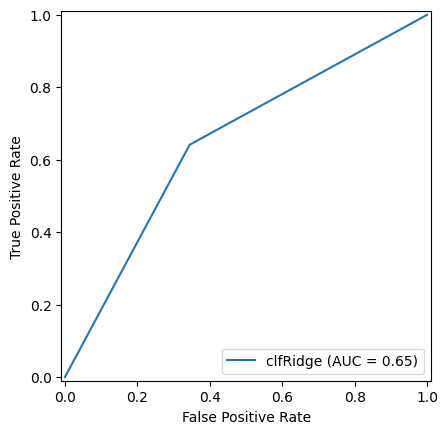

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='clfRidge')
display.plot()

## LassoClassifier

In [14]:
clfLasso = LogisticRegressionCV(penalty='l1', solver = 'saga').fit(X_train, y_train)

In [15]:
y_pred = clfLasso.predict(X_test)
joblib.dump(clfLasso, 'clfLasso_3.pkl')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75    180654
         1.0       0.32      0.64      0.43     45683

    accuracy                           0.65    226337
   macro avg       0.60      0.65      0.59    226337
weighted avg       0.77      0.65      0.69    226337



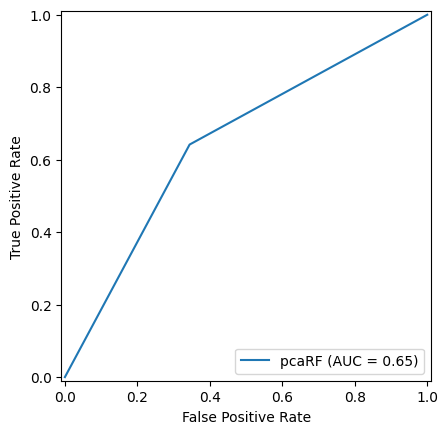

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='pcaRF')
display.plot()

## Random Forest

In [18]:
clfRF = RandomForestClassifier(max_depth = 30, random_state = 30)
clfRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, random_state=30)

In [19]:
pred = clfRF.predict(X_test)
joblib.dump(clfRF, 'clfRF_3.pkl')
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87    180654
         1.0       0.42      0.28      0.33     45683

    accuracy                           0.78    226337
   macro avg       0.63      0.59      0.60    226337
weighted avg       0.75      0.78      0.76    226337



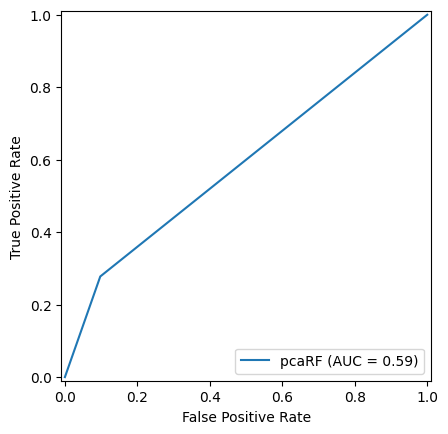

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='pcaRF')
display.plot()

## xgBoost

In [21]:
clfXGB = XGBClassifier(random_state = 30, max_depth = 30)
clfXGB.fit(X_train, y_train)
clfXGB

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [22]:
pred = clfXGB.predict(X_test)
joblib.dump(clfXGB, 'clfXGB_3.pkl')
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88    180654
         1.0       0.44      0.15      0.23     45683

    accuracy                           0.79    226337
   macro avg       0.63      0.55      0.55    226337
weighted avg       0.74      0.79      0.75    226337



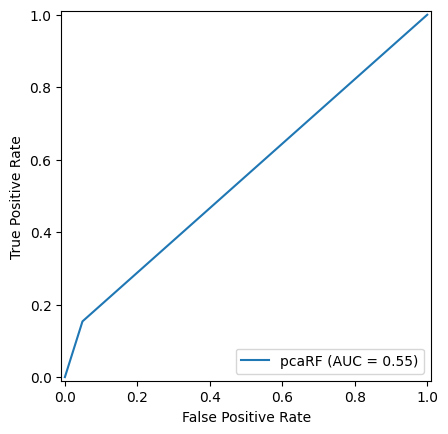

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='pcaRF')
display.plot()